# Lab Instructions

Create 3 visualizations from a spatial and time-series dataset of your choice.  Describe your dataset including where it came from and the features it contains.  Each visualization should be accompanied by at least 1 - 2 sentences explaining how the features do (or do not!) change over time and throughout space.

### About the Data
The dataset is a Zillow Home Value Index (ZHVI) dataset containing home values for different metropolitan areas across the United States, with monthly data points starting from February 1996 through August 2025.

Source: Zillow (official housing data provider). 

Columns:
- RegionID: Identifier for the region.
- SizeRank: Rank of the region by housing market size.
- RegionName: Name of the region.
- RegionType: Type of region.
- StateName: The state name abbreviation.
- Date columns: Monthly home values for that region.

### Setup

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

zillow_df = pd.read_csv("Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv")

display(zillow_df.head())
print(zillow_df.info())

# Extract date columns (all columns after the 5th index)
date_columns = zillow_df.columns[5:]
dates = pd.to_datetime(date_columns)

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,...,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31
0,102001,0,United States,country,NaN,102211.412508,102470.189937,103018.769885,103764.791517,104570.285413,...,360491.850438,359294.941819,357671.180498,357077.605215,357841.265512,360179.811807,362211.355189,363646.457548,364836.173315,363945.866521
1,394913,1,"New York, NY",msa,NY,180552.291449,179808.553950,179635.992054,179862.920329,180734.784072,...,687311.173977,685247.201636,683205.682125,684086.749183,686793.819000,693101.093206,697503.503247,702193.753677,706189.719309,705186.097843
2,753899,2,"Los Angeles, CA",msa,CA,182261.943544,183388.238498,184240.656314,184601.979749,185233.555587,...,949065.082319,946899.806873,943047.863448,946759.697745,951120.811945,955936.206605,955529.436876,954167.939019,952363.301558,945165.955045
3,394463,3,"Chicago, IL",msa,IL,130613.043648,130015.696346,131441.654956,133135.717608,134708.210237,...,327827.429842,326819.683991,325755.016031,325946.231977,327844.244065,331394.296872,334920.670567,338156.531978,341398.444011,341381.353779
4,394514,4,"Dallas, TX",msa,TX,110024.615947,110703.975074,111759.825354,112611.647454,113120.856556,...,372973.336748,370564.306189,368887.811642,368041.862811,368265.567355,369495.401865,369610.858030,368824.079377,367750.849531,365591.613987


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 360 entries, RegionID to 2025-08-31
dtypes: float64(355), int64(2), object(3)
memory usage: 2.5+ MB
None


### Visualization 1: National Housing Trends Over Time

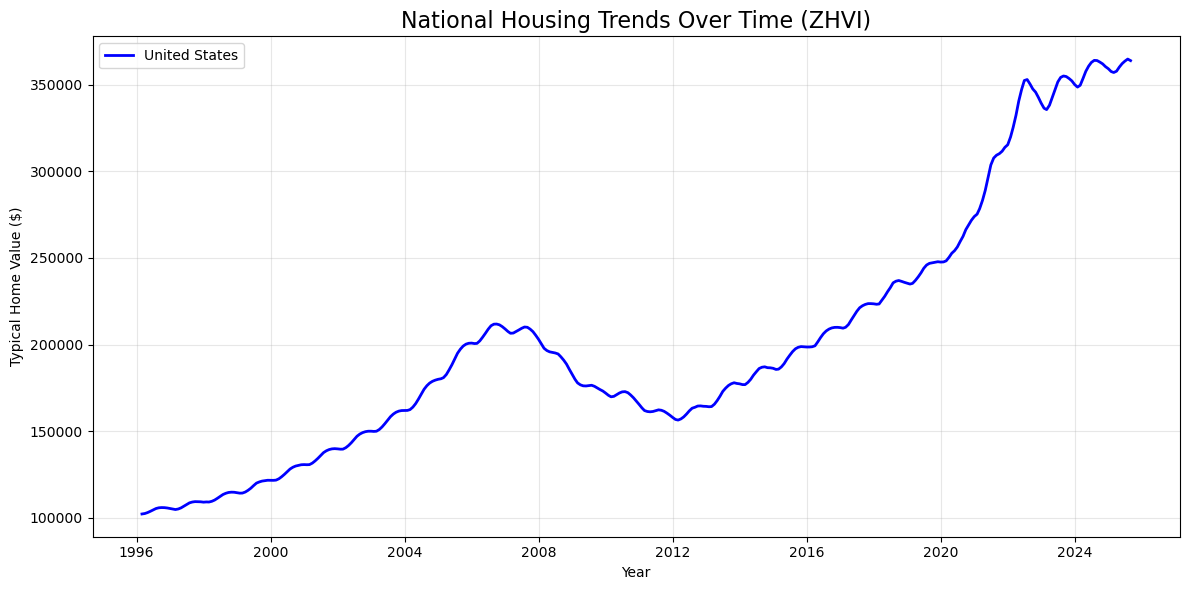

In [5]:
us_data = zillow_df[zillow_df['RegionName'] == 'United States'].iloc[:, 5:].T
us_data.index = dates
us_data.columns = ['US Home Value']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(us_data.index, us_data['US Home Value'], label='United States', color='blue', linewidth=2)
plt.title('National Housing Trends Over Time (ZHVI)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Typical Home Value ($)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

This line graph shows the overall Zillow Home Value Index (ZHVI) for the entire United States from 1996 to 2025. We can see a steady increase in home values from 1996 to 2007, followed by a sharp decline during the 2008 financial crisis. After 2012, we can see home values begin a rapid upward trend, especially during 2020–2022.

### Visualization 2: Home Value Trends in Major Areas

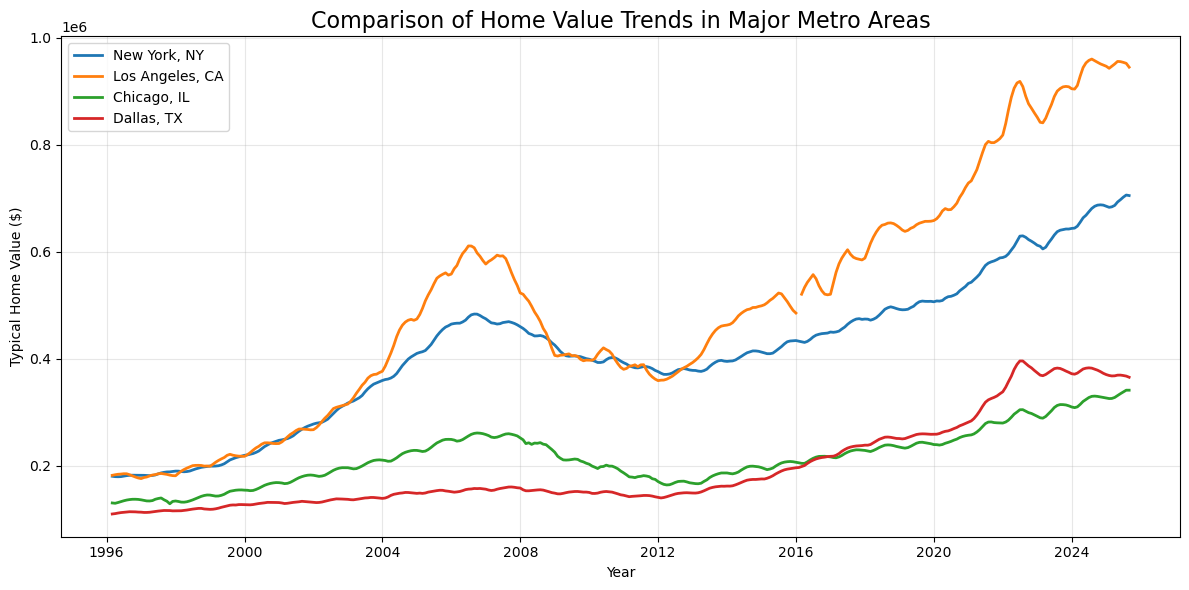

In [6]:
top_cities = ["New York, NY", "Los Angeles, CA", "Chicago, IL", "Dallas, TX"]
metro_data = zillow_df[zillow_df['RegionName'].isin(top_cities)]

plt.figure(figsize=(12, 6))

# Loop through each city and plot its time series
for _, row in metro_data.iterrows():
    plt.plot(dates, row.iloc[5:], label=row['RegionName'], linewidth=2)

plt.title('Comparison of Home Value Trends in Major Metro Areas', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Typical Home Value ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This chart compares home value growth across four major U.S. metropolitan areas: New York, Los Angeles, Chicago, and Dallas. Los Angeles shows the highest growth, indicating high demand and limited supply. New York has also experienced steady growth, though at a slower pace than Los Angeles. While the remaining two, Chicago and Dallas, have shown limited, yet consistent growth.

### Visualization 3: Geographic Heatmap of Home Values

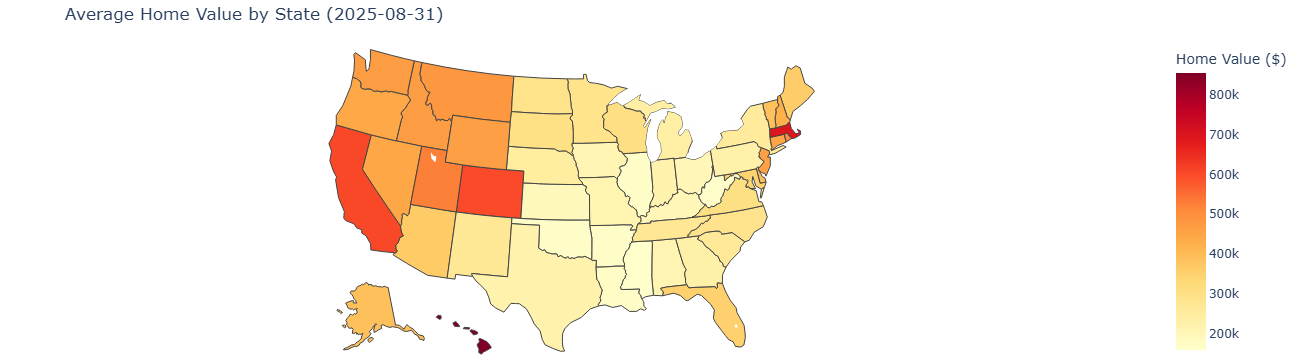

In [8]:
latest_date = date_columns[-1]
latest_values = zillow_df[['StateName', latest_date]].copy()
latest_values.rename(columns={latest_date: 'HomeValue'}, inplace=True)

state_avg = latest_values.groupby('StateName', as_index=False)['HomeValue'].mean()

# Create map
fig = px.choropleth(
    state_avg,
    locations='StateName',
    locationmode='USA-states',
    color='HomeValue',
    color_continuous_scale='YlOrRd',
    scope='usa',
    title=f'Average Home Value by State ({latest_date})',
    labels={'HomeValue': 'Home Value ($)'}
)
fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    margin=dict(l=0, r=0, t=40, b=0)
)

# Display map
fig.show()

This heatmap shows the average home value by state as of August 2025. States on the West Coast and the Northeast have the highest home values. Many states in the Midwest and South display lower average values, indicating more affordable housing markets. This spatial pattern highlights how location strongly influences housing costs, with urbanized andd coastal areas being far more expensive than rural regions.